# Lending Club Case Study

## Done by:
### Archa S A , Gopika GS

## Data Cleaning

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Removing the warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Reading the data file

Finding the encoding of loan.csv file

In [3]:
import chardet    
rawdata = open("loan.csv", 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


Reading loan.csv file

In [4]:
loan  = pd.read_csv('loan.csv',encoding = "utf-8")

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan.shape

(39717, 111)

In [7]:
#checking first 15 rows of datafram
loan.head(15)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
#chcking the datatypes of columns i dataframe
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [9]:
#check for null values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
#checking how many percentage of null values are present in each column
(loan.isnull().sum()/len(loan.id))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [11]:
null_columns=round((loan.isnull().sum()/len(loan.id))*100,2)
null_columns[null_columns>0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [12]:
droped_columns=list(null_columns[null_columns>30].index)

In [13]:
len(droped_columns)

58

In [14]:
#dropping the columns with more than 30% null values
loan=loan.drop(droped_columns,axis=1)

In [15]:
loan.shape

(39717, 53)

In [16]:
loan.head(15)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [17]:
#check for null values
loan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [18]:
loan_columns=round((loan.isnull().sum()/len(loan.id))*100,2)
loan_columns[loan_columns>0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [19]:
# compression_opts = dict(method='zip',
#                         archive_name='out.csv')  
# loan.to_csv('out.zip', index=False,
#           compression=compression_opts) 

#### Checking categorical columns

In [20]:
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [21]:
loan.title.value_counts()

Debt Consolidation                         2184
Debt Consolidation Loan                    1729
Personal Loan                               659
Consolidation                               517
debt consolidation                          505
                                           ... 
PLEASE HELP ME                                1
Winter '09                                    1
Closing Sears credit card at 21 percent       1
LOWERRATE                                     1
extra improvements                            1
Name: title, Length: 19615, dtype: int64

In [22]:
loan.collections_12_mths_ex_med.value_counts()    

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [23]:
loan.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [24]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [25]:
loan.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

We can drop collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens since majority of its values are 0

In [26]:
loan=loan.drop('tax_liens',axis=1)
loan=loan.drop('chargeoff_within_12_mths',axis=1)
loan=loan.drop('collections_12_mths_ex_med',axis=1)

dropping the rows with null vaues of pub_rec_bankruptcies  

In [27]:
loan=loan[~np.isnan(loan['pub_rec_bankruptcies'])]

Removing the rows with null values for emp_title which denotes The job title supplied by the Borrower when applying for the loan,emp_length which denotes employement length in years,title which denotes The job title supplied by the Borrower when applying for the loan,revol_util which denotes the amount of credit the borrower is using relative to all available revolving credit,last_pymnt_d  which dneotes last month of payment recived

In [28]:
loan=loan[~loan['emp_title'].isnull()]
loan=loan[~loan['emp_length'].isnull()]
loan=loan[~loan['title'].isnull()]
loan=loan[~loan['revol_util'].isnull()]
loan=loan[~loan['last_pymnt_d'].isnull()]

check for null values

In [29]:
loan_columns=round((loan.isnull().sum()/len(loan.id))*100,2)
loan_columns[loan_columns>0]

Series([], dtype: float64)

In [30]:
loan.shape

(36433, 50)

In [31]:
loan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec             

In [32]:
loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

#### Dropping the columns which doesn't contribute to the analysis

id,member_id,url has all unique values so we can't infer anything from this columns
paymnt_plan,acc_now_deiling,policy_code,intial_list_status,deiling_amnt,application_type have all same values so that can also be droped

In [33]:
#loan=loan.drop('id',axis=1)
loan=loan.drop('member_id',axis=1)
loan=loan.drop('url',axis=1)
loan=loan.drop('pymnt_plan',axis=1)


In [34]:
loan=loan.drop('acc_now_delinq',axis=1)
loan=loan.drop('policy_code',axis=1)
loan=loan.drop('initial_list_status',axis=1)
loan=loan.drop('delinq_amnt',axis=1)
loan=loan.drop('application_type',axis=1)

In [35]:
loan.shape

(36433, 42)

In [36]:
#analysing the amount columns
loan[['loan_amnt','funded_amnt','funded_amnt_inv','total_pymnt_inv','total_pymnt','out_prncp','out_prncp_inv']].head(30)

,loan_amnt,funded_amnt,funded_amnt_inv,total_pymnt_inv,total_pymnt,out_prncp,out_prncp_inv
1,2500,2500,2500.00000,1008.71,1008.710000,0.00,0.00
3,10000,10000,10000.00000,12231.89,12231.890000,0.00,0.00
4,3000,3000,3000.00000,3513.33,3513.330000,524.06,524.06
5,5000,5000,5000.00000,5632.21,5632.210000,0.00,0.00
6,7000,7000,7000.00000,10110.84,10110.840000,0.00,0.00
7,3000,3000,3000.00000,3939.14,3939.135294,0.00,0.00
9,5375,5375,5350.00000,1469.34,1476.190000,0.00,0.00
10,6500,6500,6500.00000,7678.02,7678.017673,0.00,0.00
11,12000,12000,12000.00000,13947.99,13947.989160,0.00,0.00
12,9000,9000,9000.00000,2270.70,2270.700000,0.00,0.00


In [37]:

loan[['loan_amnt','funded_amnt','funded_amnt_inv','total_pymnt_inv','total_pymnt','out_prncp','out_prncp_inv']].tail(30)

,loan_amnt,funded_amnt,funded_amnt_inv,total_pymnt_inv,total_pymnt,out_prncp,out_prncp_inv
38995,4000,4000,3000.000000,3287.98,4383.947297,0.0,0.0
38996,8000,8000,6525.000000,7377.70,9045.347408,0.0,0.0
38997,12000,12000,8425.000000,8837.09,12586.961160,0.0,0.0
38998,7500,7500,5387.500000,6395.15,8964.004915,0.0,0.0
38999,25000,25000,8933.600000,9975.25,28900.635680,0.0,0.0
39000,15000,15000,9019.298386,10261.03,17332.240720,0.0,0.0
39001,20000,20000,4031.290514,1369.23,6767.460000,0.0,0.0
39002,11000,11000,9375.000000,11191.18,13130.978620,0.0,0.0
39003,4000,4000,3432.380000,3991.54,4672.840531,0.0,0.0
39013,9500,9500,6350.000000,7277.99,10888.335650,0.0,0.0


From above we can conclude that the loan amount ,funded amount, funded amount inv are same so we need to keep only one column among the three. We can also drop either of total_pymnt_inv or total_pymnt as both has same values.

In [38]:
loan=loan.drop('funded_amnt',axis=1)
loan=loan.drop('funded_amnt_inv',axis=1)
loan=loan.drop('total_pymnt',axis=1)

In [39]:
loan[['out_prncp','out_prncp_inv']].value_counts()

out_prncp  out_prncp_inv
0.00       0.00             35367
1972.60    1972.60              2
2164.84    2164.84              1
2180.75    2180.75              1
2171.14    2171.14              1
                            ...  
951.50     951.50               1
952.95     952.95               1
957.09     957.09               1
963.99     962.61               1
6311.47    6306.96              1
Length: 1066, dtype: int64

Since 35367 rows has value as zero both can be dropped

In [40]:
loan=loan.drop('out_prncp',axis=1)
loan=loan.drop('out_prncp_inv',axis=1)

In [41]:
loan.shape

(36433, 37)

In [42]:
loan.head(30)

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
3,1076863,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,1075269,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,3000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
9,1071570,5375,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,...,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0
10,1070078,6500,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5 years,OWN,...,7678.02,6500.00,1178.02,0.00,0.00,0.0000,Jun-13,1655.54,Dec-15,0.0
11,1069908,12000,36 months,12.69%,402.54,B,B5,UCLA,10+ years,OWN,...,13947.99,12000.00,1947.99,0.00,0.00,0.0000,Sep-13,6315.30,Aug-13,0.0
12,1064687,9000,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,...,2270.70,1256.14,570.26,0.00,444.30,4.1600,Jul-12,305.38,Nov-12,0.0


# Analysis

## Univariate Analysis

In [43]:
loan['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

Since we have to consider only charged off and fully paid for our analysis we are dropping rows with loan_status as current

In [44]:
#Removing the loans that are in Current status
loan = loan[loan['loan_status'] != 'Current']

In [45]:
loan.shape

(35367, 37)

In [46]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 1 to 39680
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       35367 non-null  int64  
 1   loan_amnt                35367 non-null  int64  
 2   term                     35367 non-null  object 
 3   int_rate                 35367 non-null  object 
 4   installment              35367 non-null  float64
 5   grade                    35367 non-null  object 
 6   sub_grade                35367 non-null  object 
 7   emp_title                35367 non-null  object 
 8   emp_length               35367 non-null  object 
 9   home_ownership           35367 non-null  object 
 10  annual_inc               35367 non-null  float64
 11  verification_status      35367 non-null  object 
 12  issue_d                  35367 non-null  object 
 13  loan_status              35367 non-null  object 
 14  purpose               

### Column:loan_amnt

In [47]:
loan.loan_amnt.describe()

count    35367.000000
mean     11133.071790
std       7326.233093
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [48]:
loan.groupby('loan_status').total_pymnt_inv.sum() * 100 / loan.groupby('loan_status').loan_amnt.sum()

loan_status
Charged Off     54.135663
Fully Paid     112.734200
dtype: float64

Text(0.5, 1.0, '% of Loan Recovered')

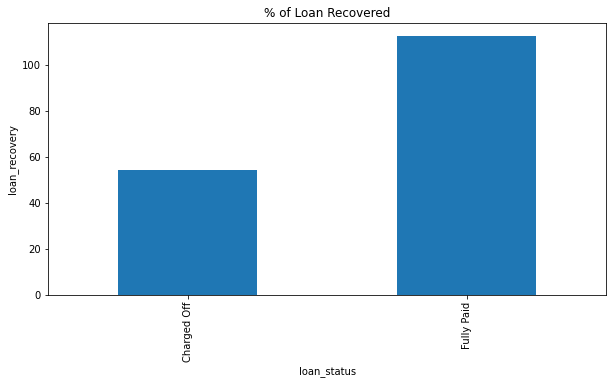

In [49]:
plt.figure(figsize=(10,5))
plot1 =(loan.groupby('loan_status').total_pymnt_inv.sum() * 100 / loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
plot1.set_ylabel('loan_recovery')
plot1.set_title('% of Loan Recovered')


In [50]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


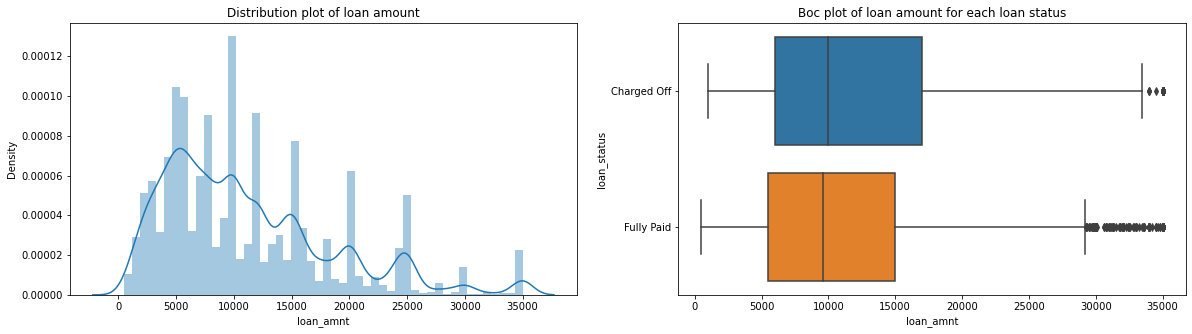

In [51]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ay = sns.distplot(loan['loan_amnt'])
ay.set_title('Distribution plot of loan amount')
plt.subplot(1, 2, 2)
ay=sns.boxplot(x=loan['loan_amnt'],y=loan['loan_status'],data=loan)

ay.set_title('Boc plot of loan amount for each loan status')
plt.show()


### Observation :
###### The loan amount mostly lies within 5000-15000 and the distribution is clustered towards right with mean greater than median. Charged off loan has a higher mean than fully paid loan

In [52]:
#Creating loan amount buckets
loan['loan_amnt_buc'] = pd.cut(loan.loan_amnt, [0, 5000, 10000, 15000, 20000, 25000], labels=['0-5000', '5000-10000', 
                                                                                     '10000-15000', '15000-20000',
                                                                                     '20000+'])

### Column : term

In [53]:
loan.term.value_counts()

 36 months    26377
 60 months     8990
Name: term, dtype: int64

Text(0.5, 1.0, '% of loan alloted for Each term ')

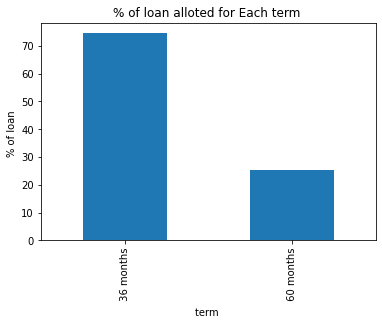

In [54]:
ax=(loan.term.value_counts(normalize=True)*100).plot.bar()
ax.set_ylabel('% of loan ')
ax.set_xlabel('term ')
ax.set_title('% of loan alloted for Each term ')

#### Observation:
##### More than 70% of loan are given for 36 months

### Column : int_rate

In [55]:
loan.int_rate.describe()

count      35367
unique       334
top       10.99%
freq         862
Name: int_rate, dtype: object

In [56]:
#Customm function to convert % columns to float
def convertToFloat(column):
    return float(column.rstrip('%'))

In [57]:
#Converting int_rate to float
loan.int_rate = loan.int_rate.apply(lambda x: convertToFloat(x))

In [58]:
loan.int_rate.describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

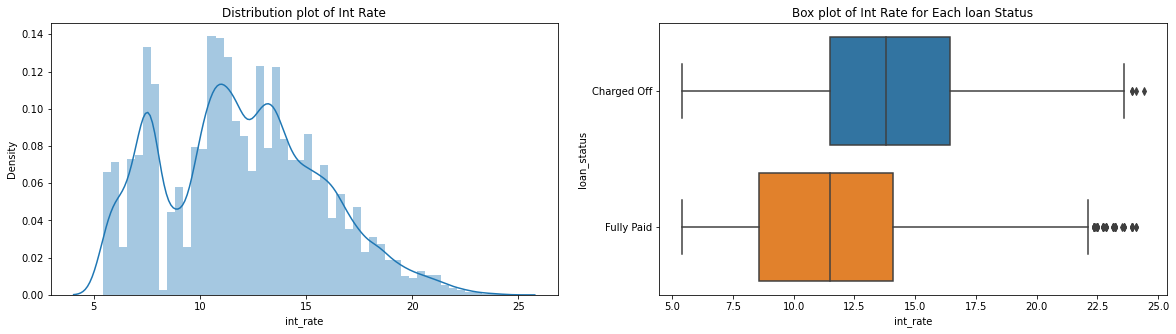

In [59]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ax=sns.distplot(loan['int_rate'])
ax.set_title('Distribution plot of Int Rate')
plt.subplot(1, 2, 2)
ay=sns.boxplot(x=loan['int_rate'],y=loan['loan_status'],data=loan)
ay=ay.set_title('Box plot of Int Rate for Each loan Status')
plt.show()


In [60]:
loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


#### Observation:
Charged off loans of higher interest rate is higher compared to fully paid.


In [61]:
#Creating interest rate buckets
loan['int_rate_buc'] = pd.cut(loan.int_rate, [0, 10, 12, 15, 20], labels=['0-10', '10-12', '12-15','15+'])

#### Column: Installment

In [62]:
loan.installment.describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

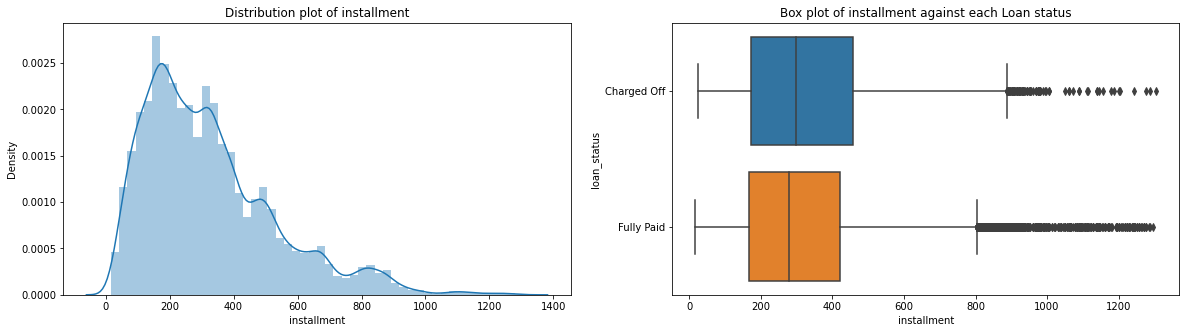

In [63]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ay=sns.distplot(loan['installment'])
ay=ay.set_title('Distribution plot of installment')
plt.subplot(1, 2, 2)
ax=sns.boxplot(x=loan['installment'],y=loan['loan_status'],data=loan)
ax=ax.set_title('Box plot of installment against each Loan status')
plt.show()


In [64]:
loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


#### Observation
Installment amount lies in the range of 167 to 427 
Charged off have higher mean of installment 

#### Column : Grade

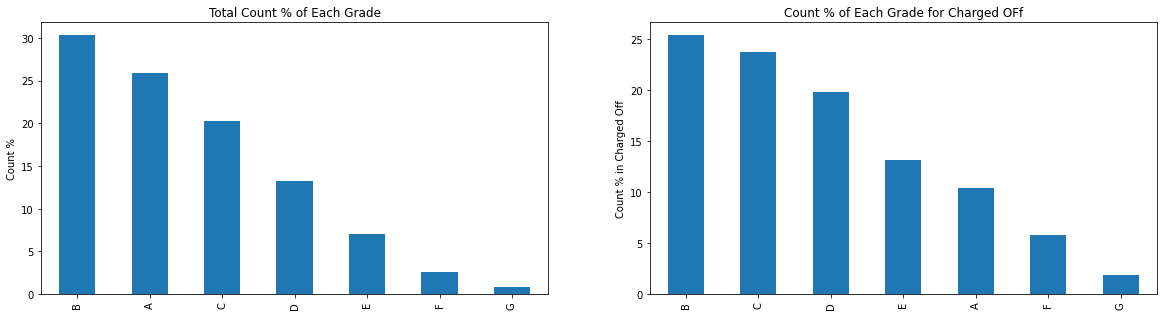

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ax=(loan.grade.value_counts(normalize=True)*100).plot.bar()
ax.set_ylabel('Count %')
ax.set_title('Total Count % of Each Grade')
plt.subplot(1, 2, 2)
ay=(loan[loan['loan_status']=='Charged Off'].grade.value_counts(normalize=True)*100).plot.bar()
ay.set_ylabel('Count % in Charged Off')
ay.set_title('Count % of Each Grade for Charged OFf')
plt.show()


#### Observation
A and B grades are less likely to fall in default list


#### Column: Sub grade

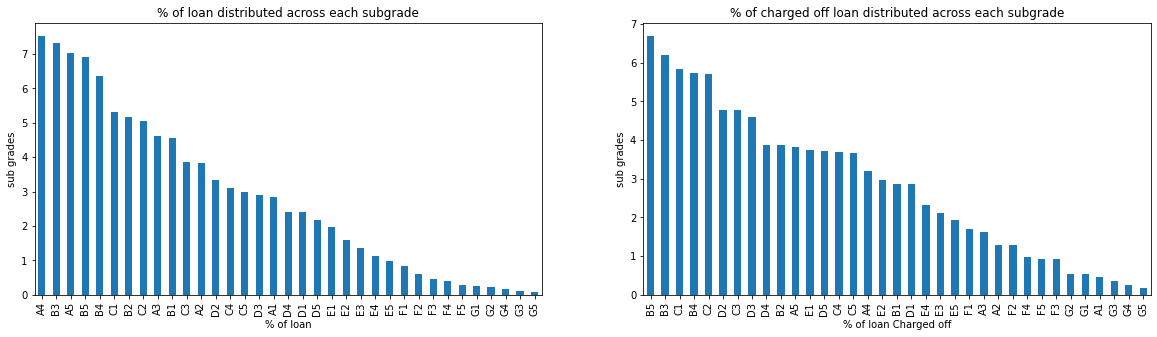

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ay=(loan.sub_grade.value_counts(normalize=True)*100).plot.bar()
ay.set_xlabel('% of loan')
ay.set_ylabel('sub grades')
ay.set_title('% of loan distributed across each subgrade')
plt.subplot(1, 2, 2)
ax=(loan[loan['loan_status']=='Charged Off'].sub_grade.value_counts(normalize=True)*100).plot.bar()
ax.set_xlabel('% of loan Charged off')
ax.set_ylabel('sub grades')
ax.set_title('% of charged off loan distributed across each subgrade')
plt.show()

#### Column:emp_length

Text(0.5, 1.0, '% of loan distributed for each emp_length')

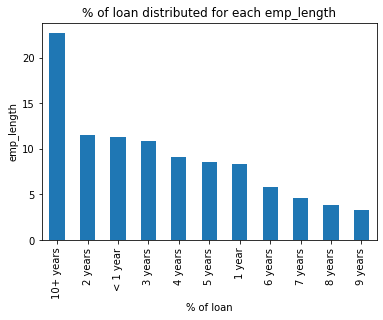

In [67]:

ay=(loan.emp_length.value_counts(normalize=True)*100).plot.bar()
ay.set_xlabel('% of loan')
ay.set_ylabel('emp_length')
ay.set_title('% of loan distributed for each emp_length')

#### Column:home_ownership

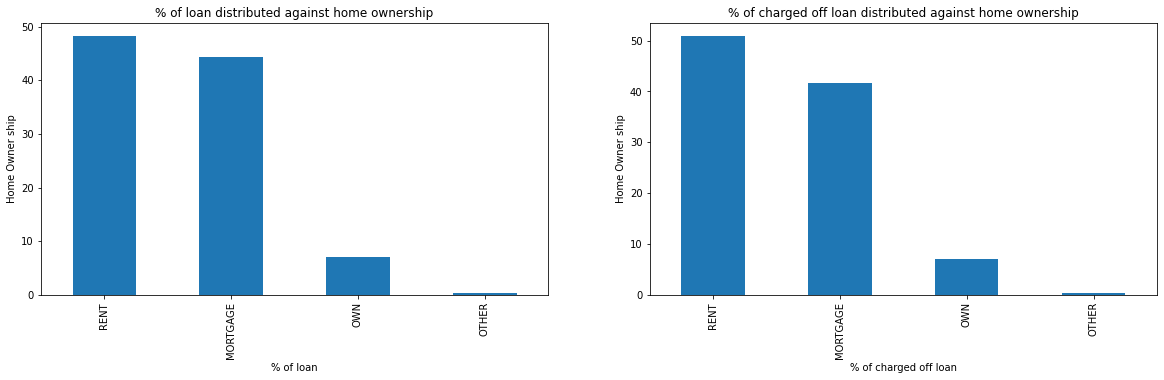

In [68]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ay=(loan.home_ownership.value_counts(normalize=True)*100).plot.bar()
ay.set_xlabel('% of loan')
ay.set_ylabel('Home Owner ship')
ay.set_title('% of loan distributed against home ownership')
plt.subplot(1, 2, 2)
ay=(loan[loan['loan_status']=='Charged Off'].home_ownership.value_counts(normalize=True)*100).plot.bar()
ay.set_xlabel('% of charged off loan')
ay.set_ylabel('Home Owner ship')
ay.set_title('% of charged off loan distributed against home ownership')
plt.show()

#### Observation:
Those having rented or mortgaged home are high chances for being a defaulter

#### Column:annual_incm

In [69]:
loan.annual_inc.describe()

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [70]:
#To avaoid scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [71]:
loan.annual_inc.describe()

count     35367.000
mean      69095.985
std       63967.047
min        4000.000
25%       41500.000
50%       60000.000
75%       82500.000
max     6000000.000
Name: annual_inc, dtype: float64

<AxesSubplot:>

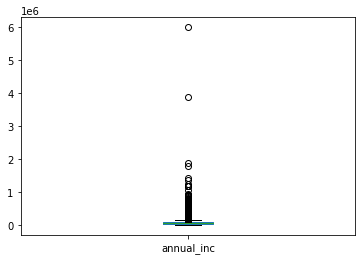

In [72]:
loan.annual_inc.plot.box()

In [73]:
#Removing the outliers from annual_inc
loan = loan[~(loan.annual_inc > 2500000)]

<AxesSubplot:>

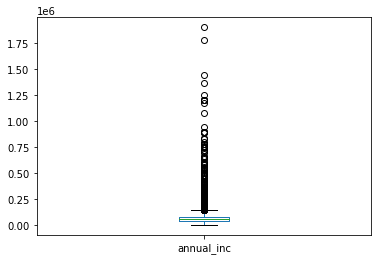

In [74]:
loan.annual_inc.plot.box()

In [75]:
loan.annual_inc.describe()

count     35365.000
mean      68819.955
std       51790.654
min        4000.000
25%       41500.000
50%       60000.000
75%       82500.000
max     1900000.000
Name: annual_inc, dtype: float64

In [76]:
#To avaoid scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [77]:
loan.annual_inc.describe()

count     35365.000
mean      68819.955
std       51790.654
min        4000.000
25%       41500.000
50%       60000.000
75%       82500.000
max     1900000.000
Name: annual_inc, dtype: float64

<AxesSubplot:>

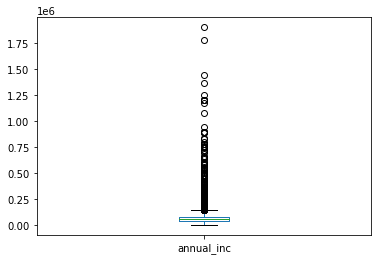

In [78]:
loan.annual_inc.plot.box()

In [79]:
#Removing the outliers from annual_inc
loan = loan[~(loan.annual_inc > 250000)]

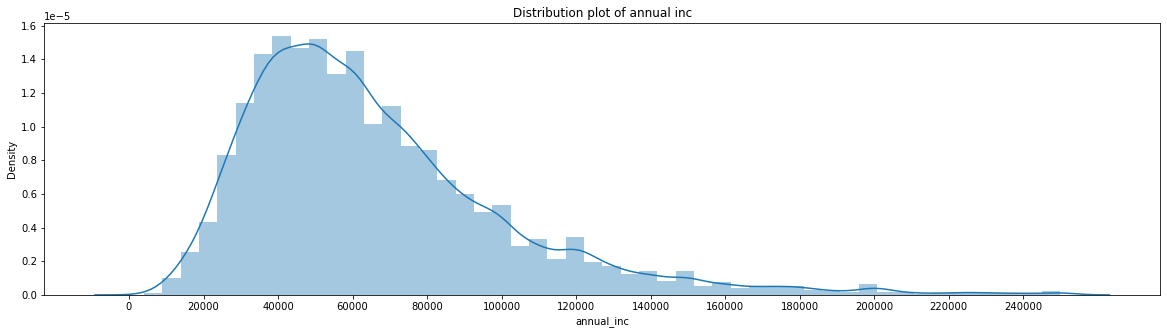

In [80]:
plt.figure(figsize=(20, 5))
ay=sns.distplot(loan['annual_inc'])
ay.set_title('Distribution plot of annual inc')
plt.xticks(np.arange(0, 250000, 20000))
plt.show()

In [81]:
#Creating annual income buckets
loan['annual_inc_buc'] = pd.cut(loan.annual_inc, [0, 20000, 40000, 60000, 80000, 100000], labels=['0-20k', '20k-40k', 
                                                                                     '40k-60k', '60k-80k',
                                                                                     '80k+'])

#### Observation:


#### Variable ; verification_status

Text(0.5, 1.0, '% of loan distributed against verification status')

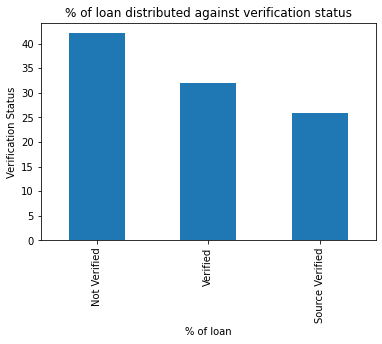

In [82]:
ay=(loan.verification_status.value_counts(normalize=True)*100).plot.bar()

ay.set_xlabel('% of loan')
ay.set_ylabel('Verification Status')
ay.set_title('% of loan distributed against verification status')

#### Variable : issue_d

In [83]:
#Creating Dervied columns loan_year and loan_month from the issue_d column
import datetime
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['loan_year'] = loan.issue_d.dt.year
loan['loan_month'] = loan.issue_d.dt.month

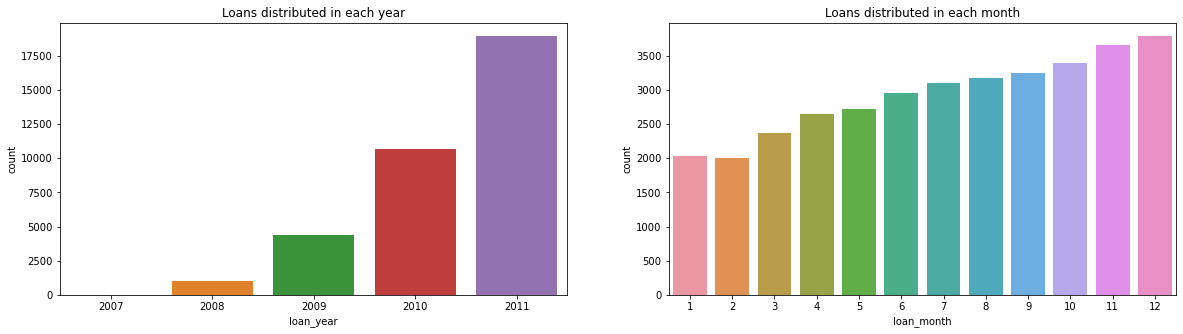

In [84]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ay=sns.countplot(loan['loan_year'], order=sorted(loan['loan_year'].unique()))
ay.set_title('Loans distributed in each year')
plt.subplot(1, 2, 2)
ay=sns.countplot(loan['loan_month'], order=sorted(loan['loan_month'].unique()))
ay.set_title('Loans distributed in each month')
plt.show()

In [85]:
loan.dti.describe()

count   35110.000
mean       13.452
std         6.622
min         0.000
25%         8.380
50%        13.555
75%        18.680
max        29.990
Name: dti, dtype: float64

<AxesSubplot:>

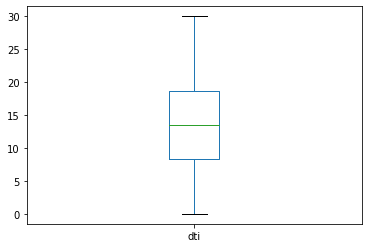

In [86]:
loan.dti.plot.box()

#Observation: The dti mostly lies within 5-20

In [87]:
#Creating dti buckets
loan['dti_buc'] = pd.cut(loan.dti, [0, 5, 10, 15, 20, 30], labels=['0-5', '5-10','10-15', '15-20','25+'])

In [88]:
loan.delinq_2yrs.describe()

count   35110.000
mean        0.145
std         0.492
min         0.000
25%         0.000
50%         0.000
75%         0.000
max        11.000
Name: delinq_2yrs, dtype: float64

<AxesSubplot:>

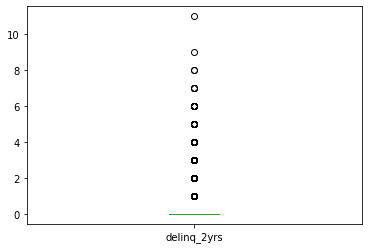

In [89]:
loan.delinq_2yrs.plot.box()

(array([3.4864e+04, 1.4700e+02, 4.8000e+01, 2.4000e+01, 1.3000e+01,
        8.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0.   ,  2962.335,  5924.67 ,  8887.005, 11849.34 , 14811.675,
        17774.01 , 20736.345, 23698.68 , 26661.015, 29623.35 ]),
 <BarContainer object of 10 artists>)

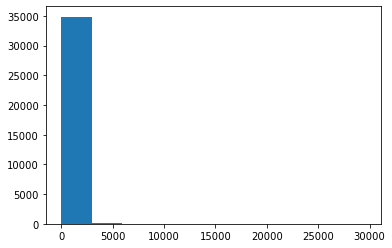

In [90]:
plt.hist(loan.recoveries)

## Bivariate Analysis

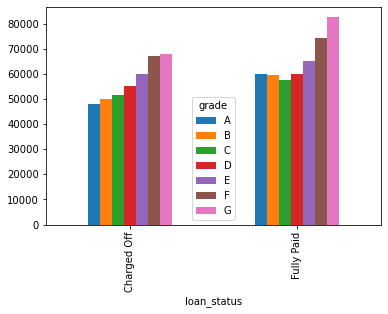

In [91]:
#Analysisng the employee grade for Fully Paid and Charged Off loans
pd.pivot_table(data = loan, index = 'loan_status', columns = 'grade', values = 'annual_inc', aggfunc = np.median).plot.bar()
plt.show()

#### purpose vs loan_status

<AxesSubplot:xlabel='purpose', ylabel='count'>

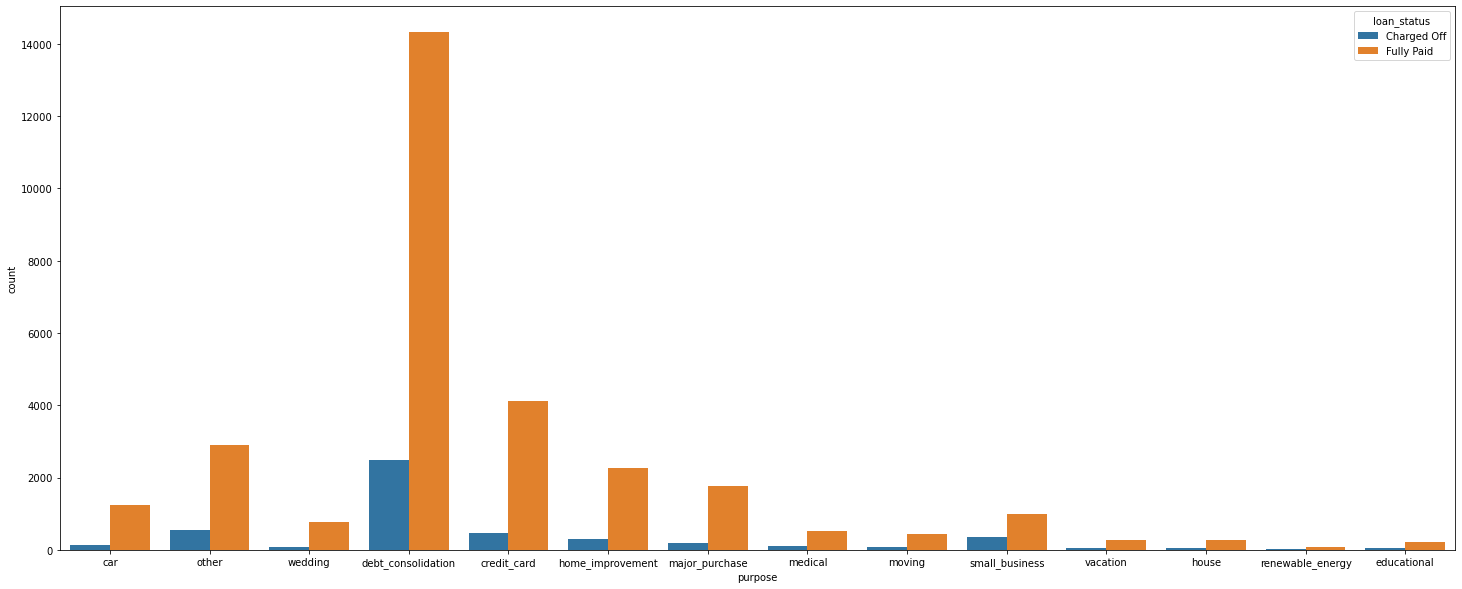

In [92]:
plt.figure(figsize=(25,10))
sns.countplot(x = 'purpose', data = loan, hue = 'loan_status')

#### Observation
The plot  shows that most of the loans where taken for the purpose of Debt Consolidation & Credit Card
#The number of loans charged off is also high for these 2.

In [93]:
#Custom function for comparison and ploting
def comparebyLoanandPlot(df,by):
    by_vs_loan = loan.groupby([by, 'loan_status']).id.count().unstack().reset_index()
    by_vs_loan['Total'] = by_vs_loan['Charged Off'] + by_vs_loan['Fully Paid']
    by_vs_loan['Charged Off %'] = round((by_vs_loan['Charged Off'] / by_vs_loan['Total']) * 100, 2)
    print(by_vs_loan) 
    sns.barplot(data = by_vs_loan, x = by , y = 'Charged Off %')

#### Grade vs Loan

loan_status grade  Charged Off  Fully Paid  Total  Charged Off %
0               A          513        8589   9102          5.640
1               B         1249        9404  10653         11.720
2               C         1165        5961   7126         16.350
3               D          978        3650   4628         21.130
4               E          640        1801   2441         26.220
5               F          281         606    887         31.680
6               G           91         182    273         33.330


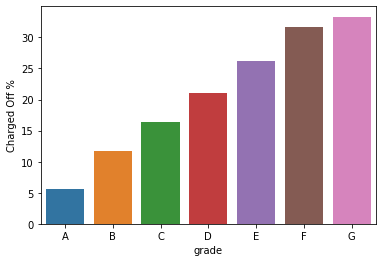

In [94]:
comparebyLoanandPlot(loan,'grade')

#### Observation: 
Here it can be observed that the borrowers in the grade G & F are more likely to default
The borrowers having Grade A has very less chances for defaulting

#### Annual Income VS Loan

loan_status annual_inc_buc  Charged Off  Fully Paid  Total  Charged Off %
0                    0-20k          162         716    878         18.450
1                  20k-40k         1304        6305   7609         17.140
2                  40k-60k         1555        8899  10454         14.870
3                  60k-80k          918        6245   7163         12.820
4                     80k+          474        3768   4242         11.170


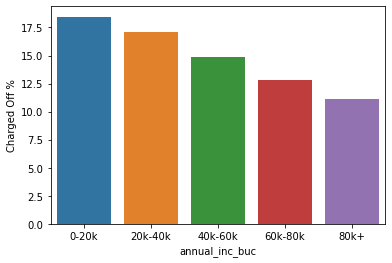

In [95]:
comparebyLoanandPlot(loan,'annual_inc_buc')

#### Observation:
Here it can be observed that the borrowers having income lower than 20k are more likely to default
than those with higher incomes
As the income increases, the charge off % decreases

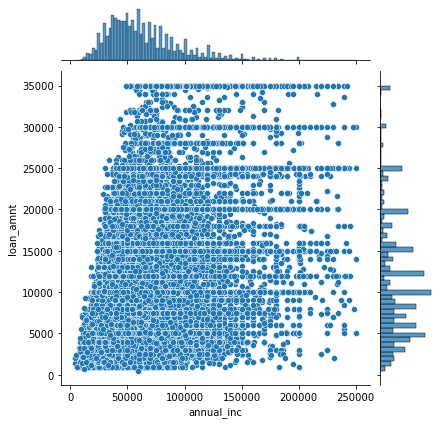

In [96]:
sns.jointplot('annual_inc', 'loan_amnt', loan[loan['annual_inc']<250000])
plt.show()

#### Interest rate vs loan

loan_status int_rate_buc  Charged Off  Fully Paid  Total  Charged Off %
0                   0-10          683       10370  11053          6.180
1                  10-12          927        6611   7538         12.300
2                  12-15         1421        7692   9113         15.590
3                    15+         1620        5079   6699         24.180


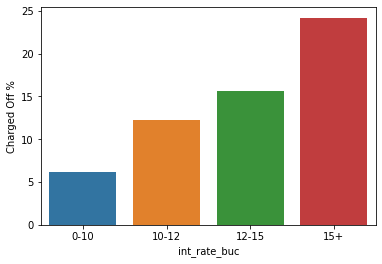

In [97]:
comparebyLoanandPlot(loan,'int_rate_buc')

#### Observation: 
Here it can be observed that the loans having interest rate greater than 15% are more likely to default
As the interest rate decreases, the charge off % decreases

#### DTI VS Loan

loan_status dti_buc  Charged Off  Fully Paid  Total  Charged Off %
0               0-5          487        3703   4190         11.620
1              5-10          842        6197   7039         11.960
2             10-15         1254        7601   8855         14.160
3             15-20         1232        6919   8151         15.110
4               25+         1080        5657   6737         16.030


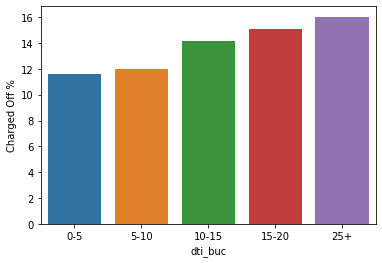

In [98]:
comparebyLoanandPlot(loan,'dti_buc')

#### Observation:
Here it can be observed that the borrowers having higher DTI more likely to default
than those with lower DTI
As the DTI decreases, the charge off % decreases


#### Public Record Bankruptices VS Loan


loan_status  pub_rec_bankruptcies  Charged Off  Fully Paid  Total  \
0                           0.000         4605       29040  33645   
1                           1.000          310        1150   1460   
2                           2.000            2           3      5   

loan_status  Charged Off %  
0                   13.690  
1                   21.230  
2                   40.000  


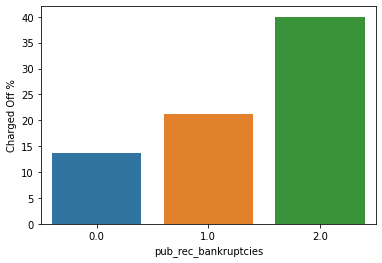

In [99]:
comparebyLoanandPlot(loan,'pub_rec_bankruptcies')

loan_status  pub_rec  Charged Off  Fully Paid     Total  Charged Off %
0                  0     4520.000   28744.000 33264.000         13.590
1                  1      387.000    1406.000  1793.000         21.580
2                  2       10.000      34.000    44.000         22.730
3                  3          NaN       7.000       NaN            NaN
4                  4          NaN       2.000       NaN            NaN


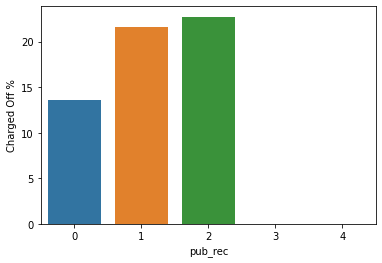

In [100]:
comparebyLoanandPlot(loan,'pub_rec')

In [101]:
loan[['pub_rec', 'pub_rec_bankruptcies']].corr()


,pub_rec,pub_rec_bankruptcies
pub_rec,1.000,0.840
pub_rec_bankruptcies,0.840,1.000


#### Observation:
Here it can be observed that the borrowers having publically recorded derogatories or  previous bankruptcies are more likely to default than those who doesn't .

#### verification_status vs loan_amnt vs loan status

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

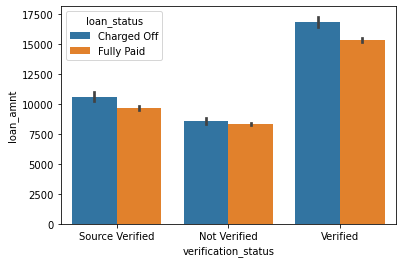

In [102]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)


#### Observation : 
As the loan amount increases LC make sure that the loan get verified properly

#### term vs loan_amnt vs loan status

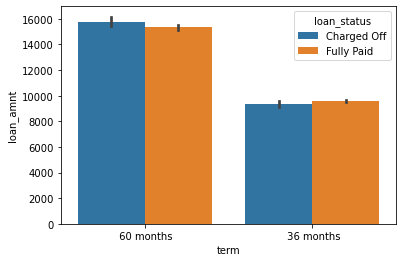

In [103]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

#### addr_state vs loan_amnt vs loan_status

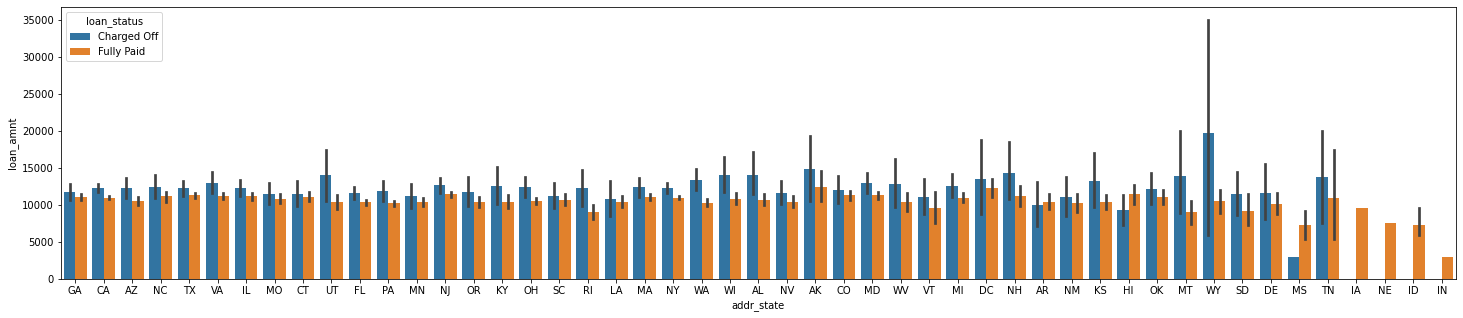

In [104]:
plt.figure(figsize=(25,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan, estimator=np.mean)
plt.show()